# Computer Vision and Image Processing - Lab Session 1

Content:
1. Introduction to OpenCV
2. Spatial Filtering
3. Edge Detection


Contacts:

- Prof: Giuseppe Lisanti  (giuseppe.lisanti@unibo.it)
- Prof: Samuele Salti  (samuele.salti@unibo.it)
- Tutor: Adriano Cardace (adriano.cardace2@unibo.it)

Course:

- Website and notebooks will be available at https://virtuale.unibo.it

# Let's firt import the data from our Google Drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


On colab we can use any bash command by appanding "!"

In [ ]:
!ls /content/drive/MyDrive/

'Colab Notebooks'   lab1_images.zip   PointDA_aligned


In [ ]:
!cp /content/drive/MyDrive/lab1_images.zip ./
!unzip lab1_images.zip

# OpenCV

OpenCV (Open source computer vision) is a library of programming functions mainly aimed at real-time computer vision.

The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene, find similar images from an image database, remove red eyes from images taken using flash, follow eye movements, recognize scenery and establish markers to overlay it with augmented reality, etc.

To import the library in your python program:

In [ ]:
import cv2

To test if your import succeds, we can print each library version number:

In [ ]:
print("The OpenCV version is:", cv2.__version__)

The OpenCV version is: 4.7.0


In this course we will use OpenCV 3.4.2.16 because it is the last version including free implementations of SIFT and SURF algorithms which we will use during this course. 

We need to import also **NumPy** and **Matplotlib** to work and display images in Python:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


## 2. Load an image

In [ ]:
image = cv2.imread('avengers.png')

The function **cv2.imread(*filename*)** load the image from the *filename* path. Although in this case we passed the **relative path** to the folder where you have the notebooks, you can pass also the **absolute path** to the image.

#### What is an image under the hood in Python?

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


* In C++, OpenCV employs its Mat matrix structure
* But in **Python**, OpenCV represents images as **NumPy n-dimensional arrays**

Since images are NumPy arrays, you are able to use all NumPy methods also on images.

For example we can print the shape of the image as we do with numpy arrays:

In [ ]:
print(image.shape)

(549, 910, 3)


The shape in case of images represents the **Height** and the **Width** of the image, along with the numbers of **channels**.

In this case your image has an **Height = 549**, a **Width = 910** and **Channels = 3**. The shape *(H,W,C)* is a **Tuple**.


In [ ]:
# Printing height width and channels separately
height = image.shape[0]
width = image.shape[1]
ch = image.shape[2]

print("The Height is:",height)
print("The Width is: ",width)
print("The Number of Channels is: ",ch)

The Height is: 549
The Width is:  910
The Number of Channels is:  3


Moreover, if you want to get the bit-depth (the number of bits per pixel) of an image you can print the dtype of the array.

In [ ]:
print(image.dtype)

uint8


Images have usually 8-bit depth, therefore, each pixel contains a value from 0 to 255 (i.e. uint8).

## 3. Display the image

Using Matplotlib we are able to display the image:

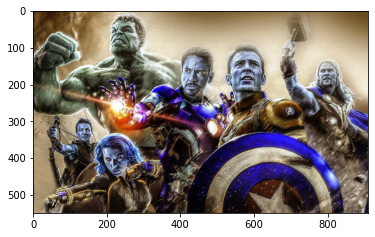

In [ ]:
plt.imshow(image)
plt.show()

Why are the colors strange? 

Usually, colored images have 3 channels: **Red**, **Green** and **Blue** (**RGB**). Matplotlib requires images in this format to display them correctly. 

On the other hand, OpenCV loads images as **Blue**, **Green** and **Red** (**BGR**). 

It is just a convention. So if you want to  plot images with original colors using the library **matplotlib**, you need a conversion!

In [ ]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

And then, plot the new version:

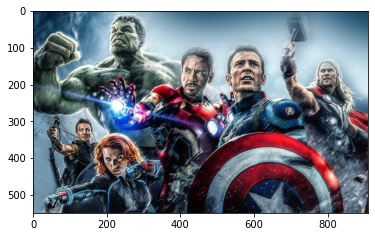

In [ ]:
plt.imshow(image_rgb)
plt.show()

The function **cv2.cvtColor(*image*,*converstion_type*)** will return the modified version of the original *image* applying the conversion represented by *converstion_type*. In this case the *converstion_type* is **cv2.COLOR_BGR2RGB** that means a converstion from BGR to RGB. 

You can also set the figure dimension using **plt.figure(figsize=(height_value, width_value))**.

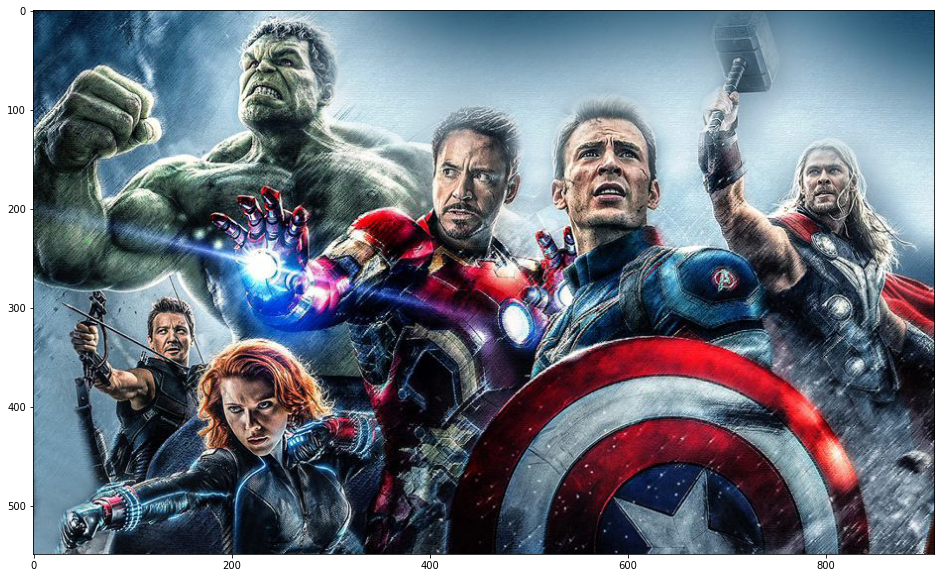

In [ ]:
plt.figure(figsize=(20, 10)) # (20,10) is the maximum allowed figure size.
plt.imshow(image_rgb) # imshow changes the figure size to mantain the image's aspect ratio.
plt.show()

## 4. Access Image Pixels

In Python a 2D image is represented as a Matrix. Each element of the matrix represents one **pixel**. Since a color image has 3 channels per pixel, our representation is not a simple Matrix, but is 3-dimensional array called **Tensor**.

So let's try to access one random pixel. For example one belonging to the Ironman's suit:

In [ ]:
ironman_pixel = image[280,400]
print("The pixel value is:",ironman_pixel)

The pixel value is: [ 27   0 125]


With the previous notation we accessed to the pixel with *row=280*, *column=400*. 

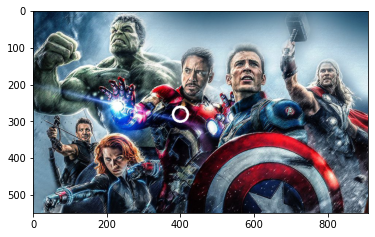

In [ ]:
# !!!Only for visualization!!!

# Drawing a white circle around the selected pixel
# We first create a copy of the image to do the drawings without changing the original image
image_copy = np.copy(image)
cv2.circle(image_copy , (400,280), 20 ,[255, 255, 255], 5)
plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
plt.show()

# !!!Only for visualization!!!

A RGB image has 3 values per pixel representing the red, green and blue channels.

In [ ]:
# Accessing blue, green and red values of the pixel

blue = ironman_pixel[0]
green = ironman_pixel[1]
red = ironman_pixel[2]

print("The BGR value of the pixel is: B={},G={},R={}".format(blue,green,red))

The BGR value of the pixel is: B=27,G=0,R=125


As expected, the dominant color is **red** so the *red* value is higher than the *blue* and *green* values. What about an hulk pixel?

In [ ]:
# Pixel vector
hulk_pixel = image[232,56]

# Separated colors
hulk_pixel_blue =  image[232,56,0]
hulk_pixel_green = image[232,56,1]
hulk_pixel_red =   image[232,56,2]

print("The BGR value of the pixel is: B={},G={},R={}".format(hulk_pixel_blue,hulk_pixel_green,hulk_pixel_red))

The BGR value of the pixel is: B=0,G=255,R=0


In the previous example we have shown first of all that **Hulk is GREEN!** .. than we used another method to access image pixels. With two indices we access the image pixel:

```
pixel = image[232,56]
```

Hence, we address each pixel component with another index:


```
red = pixel[2]
```

Or we can retrieve the pixel component directly with 3 indices:


```
pixel_red = image[232,56,2]
```







## 5. Grayscale Images vs Colored Images

In the previous sections we managed colored image only. But what about grayscale images? 

First of all download *"lenna.png"*. You should find it in the chapter *"Laboratory slides and materials"* in "LabSession2.zip". Move it to notebooks folder. 

To load a grayscale image we need to add **cv2.IMREAD_GRAYSCALE** in our **cv2.imread()** function otherwise OpenCV load a 3 channel colored image by default:

In [ ]:
# Loading a Grayscale image
grayscale_image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

print("The shape of this Grayscale Image is:", grayscale_image.shape)

The shape of this Grayscale Image is: (512, 512)


**N.B.** Grayscale images have only **1 channel** so when loading them we will have no 3rd dimension in our array! 

Let's show the image (we add the 3 arguments *cmap='gray', vmin=0, vmax=255* to tell the plot library that is a grayscale picture with values from 0 to 255):

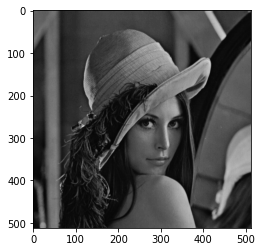

In [ ]:
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.show()

So what about Pixels now? Each pixel now is not a vector anymore, but a single intensity value between 0-255.

In [ ]:
print(grayscale_image[0,0])

101


**N.B** Remember that a pixel value of 0 is **Black** and a value of 255 is **White**.

Sometimes we want to convert color images into grayscale images. To do so we can use **cv2.cvtColor()** with a different flag:

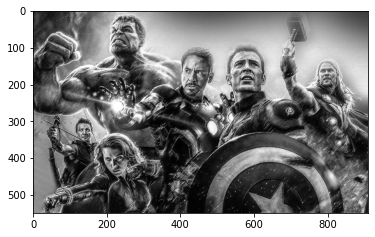

In [ ]:
image_color2grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_color2grayscale, cmap='gray', vmin=0, vmax=255)
plt.show()

## 6. Access R, G, B channels separately

In colored images each channel R,G,B can be seen as a single R,G,B image and you can plot it independetly. 

If we want to access the three channels separately we can do it easily using slicing (same as Numpy arrays!).

In the following code we will extract the 3 channels representing the R,G,B values of the image and we will plot them in three different grayscale images:

In [ ]:
R = image_rgb[:,:,0] # Getting the first axis, Red
G = image_rgb[:,:,1] # Getting the second axis, Green
B = image_rgb[:,:,2] # Getting the third axis, Blue

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)

(549, 910) (549, 910) (549, 910)


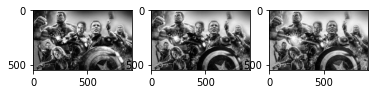

In [ ]:
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.show()

In the image above you cannot disambiguate the three images because the 3 axis contain similar information. But let us try with a completely green image: 

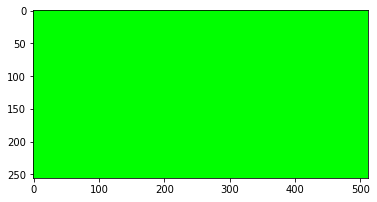

In [ ]:
green_image_bgr = cv2.imread("green.png") # BGR by default
green_image_rgb = cv2.cvtColor(green_image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(green_image_rgb)
plt.show()

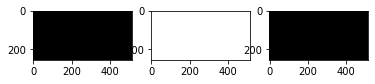

In [ ]:
R = green_image_rgb[:,:,0] # Getting the first axis, Red
G = green_image_rgb[:,:,1] # Getting the second axis, Green
B = green_image_rgb[:,:,2] # Getting the third axis, Blue

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.show()

**Only the Green channel has values greater than 0!**
This is because only G channel has meaningful values different from 0.

**N.B.** Now that we know how to extract channels, we could perform the BGR to RGB conversion simply by splitting the channels and than concatenating them in the inverse order along the third dimension using **Numpy** methods. 

We can use **np.stack([R,G,B], axis=2)** to do that.

B, G and R shapes : (549, 910) (549, 910) (549, 910)
image_rgb shape :  (549, 910, 3)


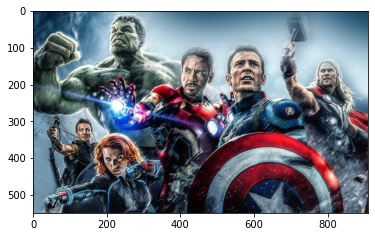

In [ ]:
# Stacking B,G,R along the axes of channels (axis=-1, last channel).

B = image[:,:,0] # Getting the first axis, Red
G = image[:,:,1] # Getting the second axis, Green
R = image[:,:,2] # Getting the third axis, Blue

image_rgb = np.stack([R,G,B], axis=-1) # Axis specifies the position of the new axis. -1 means last position. 
print('B, G and R shapes :',B.shape, G.shape, R.shape)
print('image_rgb shape : ',image_rgb.shape)

plt.imshow(image_rgb)
plt.show()

## 7. Access Image Region of Interests (ROIs)

In the previous section we have seen how to access to single pixels. But what about a bigger portion of the image?
We just need to do **slicing** as for all numpy arrays! 
For example if we want to extract Captain America from the starting image, what slicing do we need?

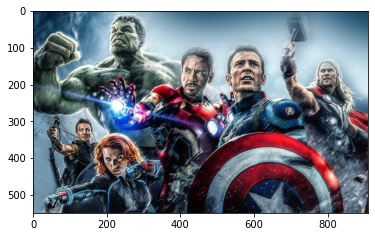

In [ ]:
# Displaying starting image
plt.imshow(image_rgb)
plt.show()

To cut out **Captain America** of the image we need to perform the following slice:

In [ ]:
captain_america = image_rgb[100:,400:820]

In the example above we accesed the RoI going from row 100 to last row (100:) and from column 400 to column 820 (400:820) to contain all Captain America.

**N.B.** The rows are ordered from top to bottom while the columns from left to right. 

Now let us show the selected RoI:

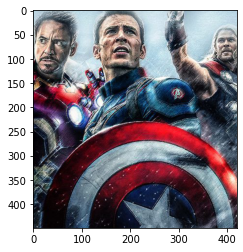

In [ ]:
plt.imshow(captain_america)
plt.show()

## 8. Modify pixels and Save image

Up to now, we accessed pixels without modifying the original image.

If we want to edit the value of a single pixel of the image we could do:

In [ ]:
print("Previous value: ", grayscale_image[0,0])
grayscale_image[0,0] = 255
print("New value: ",grayscale_image[0,0])

Previous value:  101
New value:  255


Tipically, before to modify images, it is raccomended to make a backup of those images. To do so, we first **copy** the images and then we perform all modifications on the copy of the images.

Moreover we can modify more than one pixel at once. For example, let us try to edit the *lenna.png* grayscale image around a pupil of the girl:

In [ ]:
# Copy of the original image
copied_image = grayscale_image.copy()

# Pupil coordinates
center_row = 264
center_column = 268
radius = 5

new_color = 255 # White

copied_image[center_row - radius : center_row + radius, center_column - radius: center_column + radius] = new_color

Show the image:

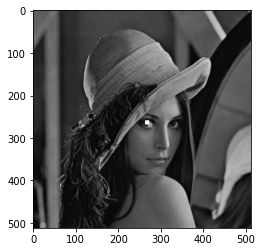

In [ ]:
plt.imshow(copied_image, cmap='gray', vmin=0, vmax=255)
plt.show()

We can notice how the original image stayed unchanged:

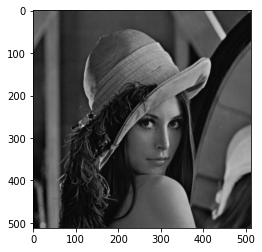

In [ ]:
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.show()

When you have done the modifications, you can save the image on disk.

In [ ]:
cv2.imwrite("lenna_white_pupill.png", copied_image)

True

In case of **color images** if we want to modify a pixel we have to assing 3 values, one for each channel BGR:

In [ ]:
copied_image_rgb = image_rgb.copy()

print("Previous value: ", copied_image_rgb[0,0])
copied_image_rgb[0,0] = [255,255,255]
print("New value: ", copied_image_rgb[0,0])

Previous value:  [18 32 43]
New value:  [255 255 255]


Same as in grayscale images we can modify more RGB pixels at once. Let us try to mask captain america assigning all white pixels to the RoI:

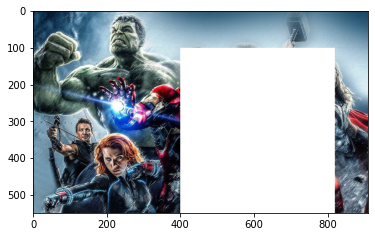

In [ ]:
copied_image_rgb[100:,400:820] = np.asarray([255,255,255])
plt.imshow(copied_image_rgb)
plt.show()

In the same way of before we can save the image. With **cv2.imwrite** we can save our image with several codings such as *.png, .jpg, .bmp, etc ...*. 

**N.B** As for loading image, OpenCV expects to have a BGR image by default, but we performed the masking operation on an RGB image. Remember to convert back to BGR before saving!

In [ ]:
copied_image_bgr = cv2.cvtColor(copied_image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("avengers_no_captain_america.jpg", copied_image_bgr)

True

# Spatial filtering



## Local Operators: Convolutions and Correlations 

Local Operators compute the new intensity of a pixel, p, based on the intensities of those belonging to a neighbourhood of p.

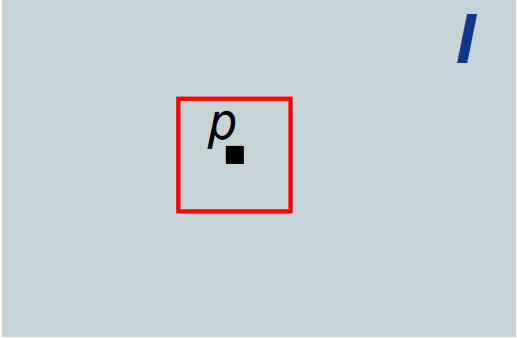

We know that **convolutions and correlations** are the same if we have a **symmetric** kernel respect to the **origin**:

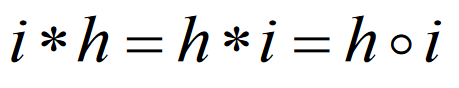

Practically, local operator kernels are usually symmetric about the origin so usually we compute **correlations** instead of convolutions because they are **easier to implement**. In case we have not symmetric filter respect to the origin we can still use correlations but we need to first **flip the kernel**.

Given an image and a kernel (aka filter) in OpenCV we can perform a correlation with the following command:

**cv2.filter2D(image, -1, kernel, anchor)**

where **anchor** of the kernel indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.

If we need to compute a convolution we need to flip the kernel using:

**cv2.flip(kernel)**

In case of flip we need to set the new anchor to (kernel.cols - anchor.x - 1, kernel.rows - anchor.y - 1).



## Let's see how to implement a mean filter

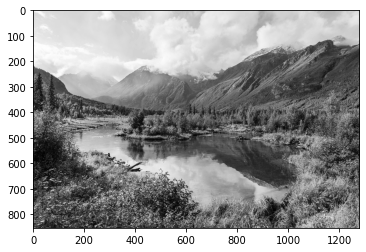

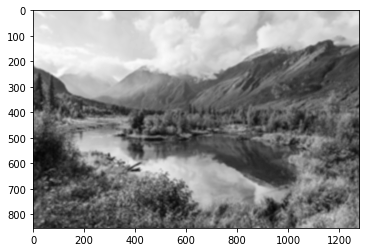

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

k_size = 9
mean_kernel = np.ones([k_size,k_size])/(k_size**2)

img_tr = cv2.filter2D(img,-1,mean_kernel)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

## Local Operators: Some Peculiar Filters



### Gaussian filter
Gaussian filter is a special case of LSI operator where we sample from a 2D gaussian the values of our kernel.  

Given standard deviation $\sigma$ and kernel size we can obtain a 1D gaussian kernel in OpenCV with:

**gk = cv2.getGaussianKernel(kernel_size,sigma)**

which 1D having shape $(KernelSize , 1)$

If we want a 2D gaussian filter with both $\sigma_x$ and $\sigma_y$ having the same value we can multiply the two 1D kernels with:

**gk_2D = gk.dot(gk.transpose())**

Otherwise, we can obtain the same result applying first the 1D gaussian kernel **gk** and then, applying its tranposed one **$gk^T$**. Applying twice a 1D kernel instead of a 2D filter can be faster, expecially in case of big kernels.

We can also use an high level API of OpenCV which given the kernel size and sigmas compute the gaussian filtering:

**gauss_out = cv2.GaussianBlur(image, (k_size,k_size) , sigma)**



### Bilateral filter

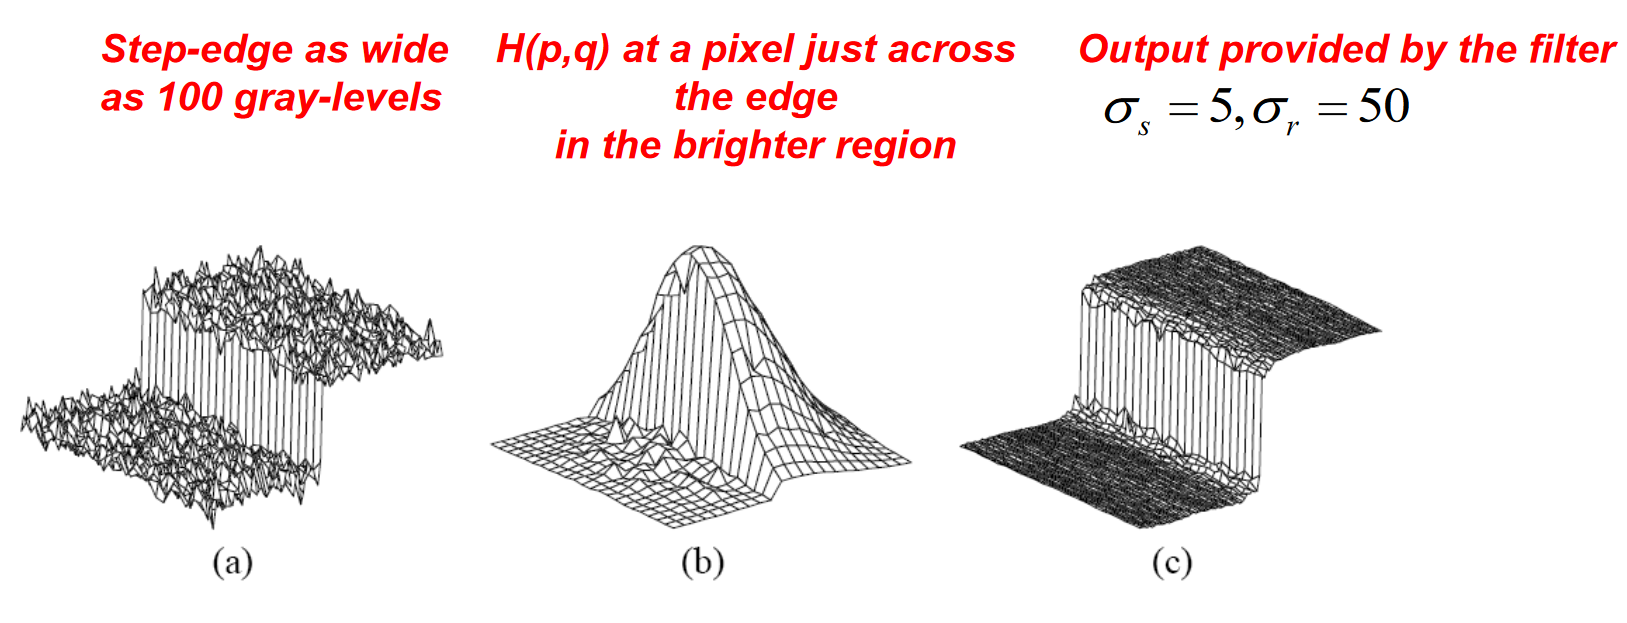
Bilateral filter is highly effective at **noise removal** while **preserving edges**. 

The operation is **slower** compared to other filters. 

**Gaussian filters** is a function of **space** alone and does not consider whether pixels have almost the same intensity value or not resulting in blurred edges. 

On the other hand, the **bilateral filter** also uses a **Gaussian filter** in the **space** domain, but it also uses one more (multiplicative) **Gaussian filter** component which is a function of **pixel intensity differences**. 

The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

We can apply a bilateral filter in OpenCV with:

**cv2.bilateralFilter(image, filter_size, sigmaColor, sigmaSpace)**.

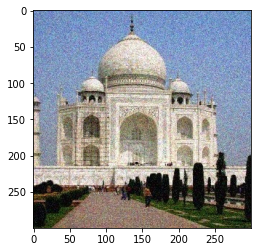

In [ ]:
#load a noisy image
img = cv2.imread('taj.jpg')
image_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

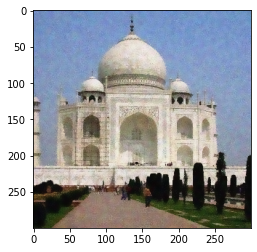

In [ ]:
# now let's see what happens when we apply a bilateral filter!
denoised_img = cv2.bilateralFilter(image_rgb,9,200,75)
plt.imshow(denoised_img, cmap='gray', vmin=0, vmax=255)

# Edge detection


Canny Edge Detection is a popular edge detection algorithm and it is already implemented in the OpenCV library.




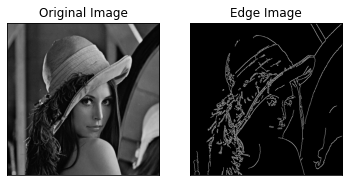

In [ ]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


#Now it's your turn!

## Exercise 0: Differences between Images



#### 1: Compute the pixel-wise difference between two pictures: Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.



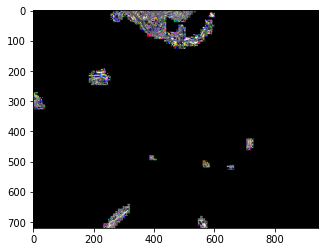

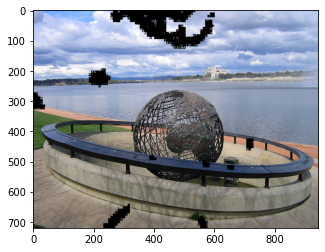

True

In [ ]:
# Read images
image1 = cv2.imread("differences1.png")
image2 = cv2.imread("differences2.png")

############ Write your code here ############

# Perform Difference
abs_diff = np.abs(image1 - image2)

# Display Image
plt.imshow(cv2.cvtColor(abs_diff, cv2.COLOR_BGR2RGB))
plt.show()

# Compute mean difference along last axis and mask image based on threshold
mean_rgb_diff = np.mean(abs_diff, axis=-1)
output_image = np.copy(image1)
output_image[mean_rgb_diff > 0] = 0

#############################################

# Display Image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# Save image on disk
cv2.imwrite("spot_the_difference.png", output_image)

## Exercise 1: Gaussian Filter

Apply a 2D gaussian filter with $\sigma=1.5$ to an image.

Do it twice:
* Finding the gaussian kernel and applying it (cv2.getGaussianKernel). First by exploiting the gaussian separability and then with a 2D kernel.
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the __grayscale__ image "landscape.jpg".

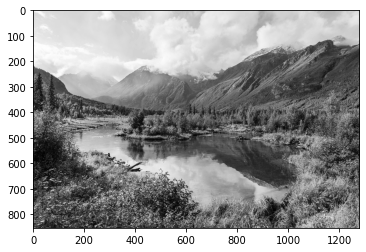

Sigma: 1.5, Kernel Size: 11
Time needed twice 1D:  0.012579202651977539


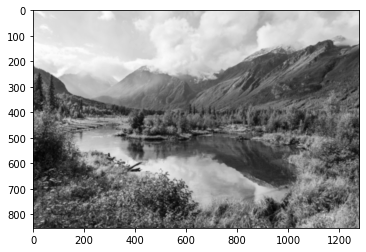

Time needed single 2D (SLOWER):  0.02588033676147461


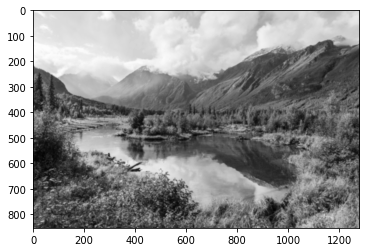

Time needed with OpenCV API (Best Optimization):  0.009845256805419922


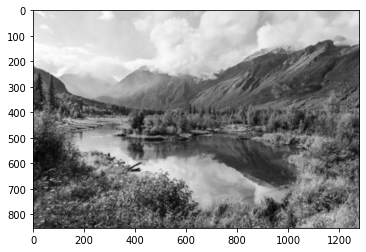

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time # Library to compute timings

# Reading the image
img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Higher sigmas should correspond to larger kernels. usually big as 
sigma = 1.5
k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
print("Sigma: {}, Kernel Size: {}".format(sigma, k_size))

############ Write your code here ############

# Finding the gaussian kernel 1D 11x1
gaussian_kernel_1D = cv2.getGaussianKernel(k_size, sigma)

start = time.time()
img_tr1 = cv2.filter2D(img,-1,gaussian_kernel_1D)
img_tr = cv2.filter2D(img_tr1,-1,gaussian_kernel_1D.transpose())

#############################################

print("Time needed twice 1D: ", time.time()-start)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

############ Write your code here ############

# Finding the gaussian kernel 2D 11x11
gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())
start = time.time()

# Applying the kernel
img_tr = cv2.filter2D(img,-1,gaussian_kernel_2D)

#############################################

print("Time needed single 2D (SLOWER): ", time.time()-start)


# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()


# Using OpenCV function GaussianBlur
############ Write your code here ############

start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size,k_size) , sigma)
print("Time needed with OpenCV API (Best Optimization): ", time.time()-start)
# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

#############################################


## Exercise 2: Bilateral Filter
Apply a bilateral filter with filter size of 9x9 and both sigma values of 75. 

Test it on the __grayscale__ image "landscape.jpg".

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

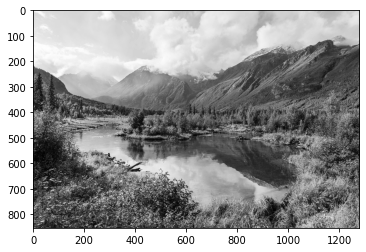

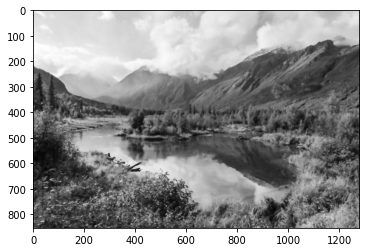

In [ ]:
# Reading the image
img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()


############ Write your code here ############

img_bilateral = cv2.bilateralFilter(img,9,75,75)

#############################################

# Plot the result
plt.imshow(img_bilateral,cmap='gray',vmin=0,vmax=255)
plt.show()


## Exercise 3: Sobel Filter
Apply the Sobel kernels to calculate the smooth derivates $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along x and y respectively. Visualize the absolute value of the two results.

Then, calculate the module of the gradient as $max(abs(\frac{dI(x, y)}{dx}), abs(\frac{dI(x, y)}{dy}))$ and visualize also this last result.

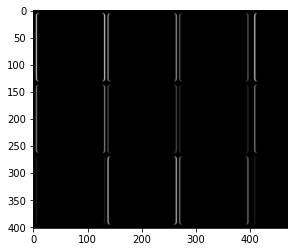

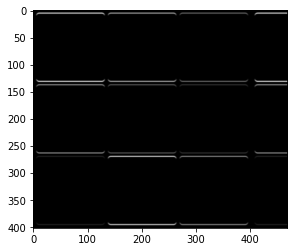

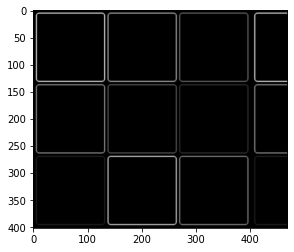

In [ ]:
img = cv2.imread("squares.png",cv2.IMREAD_GRAYSCALE)

############ Write your code here ############

# Defining sobel kernels
sobel_kernel_x = np.array([
            [-1,0,1],
            [-2,0,2],
            [-1,0,1]])*1/4

sobel_kernel_y = np.array([
            [-1,-2,-1],
            [0,0,0],
            [1,2,1]])*1/4

# Finding dI(x, y)/dx
dx = cv2.filter2D(img.astype(float),-1,sobel_kernel_x)
dx = np.abs(dx)

#############################################

plt.imshow(dx,cmap='gray',vmin=0,vmax=255)
plt.show()

############ Write your code here ############

# Finding dI(x, y)/dy
dy = cv2.filter2D(img.astype(float),-1,sobel_kernel_y)
dy = np.abs(dy)

#############################################
plt.imshow(dy,cmap='gray',vmin=0,vmax=255)
plt.show()

############ Write your code here ############
# Finding gradient module pixel-wise
sobel = np.maximum(dx,dy)

#############################################
plt.imshow(sobel,cmap='gray',vmin=0,vmax=255)
plt.show()